In [1]:
# Copyright (c) 2022, Clinical ML lab
# Licensed under the BSD 3-clause license (see LICENSE.txt)

# ---------------------------------------------------------
# Unit test for synthetic data generation and baselines
# ---------------------------------------------------------

from __future__ import absolute_import, division, print_function
from matplotlib import pyplot as plt
import numpy as np
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
IN_COLAB = 'google.colab' in sys.modules

In [3]:
if IN_COLAB: 

  from google.colab import drive
  drive.mount('/content/drive/')

  %cd /content/drive/My Drive/Colab Notebooks/TCP

In [6]:
from data.synthetic import *
from conformal.quantiles import *
from conformal.TCP import *
from utils.visualize import *
from utils.metrics import *
import sys 
import six
sys.path.append('./conformal/cqr/')
sys.path.append('./conformal/chr/')
sys.modules['sklearn.externals.six'] = six
from conformal.baselines import *

In [7]:
data_params = dict({"a":-5, 
                    "b": 5, 
                    "T":2, #10, 
                    "C_1":4.5, 
                    "C_2":1.5, #0, 
                    "alpha":0.1, 
                    "form":"sin", #"cos",  
                    "feature_dist":"gaussian"}) 

In [8]:
alpha                       = .1

n_train                     = 1000
n_calibration               = 2000
n_test                      = 1000

#X_train, Y_train, q_train = sample_data(n=n_train, **data_params)
X_calib, Y_calib, q_calib   = sample_data(n=n_calibration, **data_params)
X_test, Y_test, q_test      = sample_data(n=n_test, **data_params)

data_params["feature_dist"] = "fixed" 

X_fixed, Y_fixed, q_fixed   = sample_data(n=1000, **data_params)

## **Conformal prediction**

In [55]:
q_conformal           = empirical_quantile(Y_calib, alpha=alpha)

In [56]:
# make this efficient (run experiment script)

training_data_plot    = prepare_plot(X=X_test, Y=Y_test, type="scatter", 
                                     args=dict({"color":"white", 
                                                "edgecolors":"dimgray", 
                                                "s":5}))

tr_quant_upper_plot   = prepare_plot(X=X_fixed, Y=np.abs(q_fixed), type="plot",
                                     args=dict({"color":"blue", 
                                                   "label":"True quantile"}))

tr_quant_lower_plot   = prepare_plot(X=X_fixed, Y=-1*np.abs(q_fixed), type="plot",
                                     args=dict({"color":"blue"}))


cp_quant_upper_plot   = prepare_plot(X=X_fixed, Y=np.abs(q_conformal) * np.ones(len(X_fixed)), type="plot",
                                     args=dict({"color":"black", 
                                                "linewidth":3, 
                                                "linestyle":":", 
                                                "label":"CP quantile"}))

cp_quant_lower_plot   = prepare_plot(X=X_fixed, Y=-1*np.abs(q_conformal) * np.ones(len(X_fixed)), type="plot",
                                     args=dict({"color":"black", 
                                                "linewidth":3, 
                                                "linestyle":":"}))

In [57]:
plot_dict             = dict({"training data"    : training_data_plot,
                              "tr_quantile_upper": tr_quant_upper_plot,
                              "tr_quantile_lower": tr_quant_lower_plot,
                              "cp_quantile_upper": cp_quant_upper_plot,
                              "cp_quantile_lower": cp_quant_lower_plot})

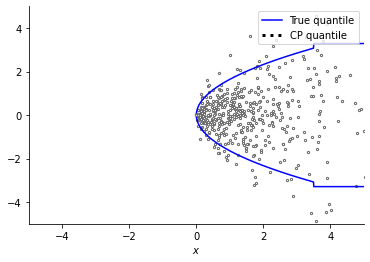

In [58]:
plotting(plot_dict, 
         legend=True, 
         xlabel="$x$",
         ylabel=None,
         legend_loc="upper right",
         xlim=(-5, 5),
         ylim=(-5, 5),
         save=False,
         filename=None)

## **Transparent conformal prediction**

In [10]:
TCP_model = TCP_RIF(delta=0.05)

TCP_model.fit(X_calib, Y_calib)

q_TCP_RIF, r_TCP_RIF  = TCP_model.predict(X_fixed)

In [ ]:
tcp_quant_upper_plot  = prepare_plot(X=X_fixed, Y=q_TCP_RIF, type="plot",
                                     args=dict({"color":"red", 
                                                "linewidth":3, 
                                                "linestyle":"--", 
                                                "label":"TCP-RIF quantile"}))

tcp_quant_lower_plot  = prepare_plot(X=X_fixed, Y=-1*q_TCP_RIF, type="plot",
                                     args=dict({"color":"red", 
                                                "linewidth":3, 
                                                "linestyle":"--"}))

In [ ]:
plot_dict.update({"tcp_quant_upper": tcp_quant_upper_plot,
                  "tcp_quant_lower": tcp_quant_lower_plot})

In [ ]:
plotting(plot_dict, 
         legend=True, 
         xlabel="$x$",
         ylabel=None,
         legend_loc="upper right",
         xlim=(-5, 5),
         ylim=(-5, 5),
         save=False,
         filename=None)

In [ ]:
# check performance with the original notebook / display relevance groups / sample splitting for TCP
# take predictions and generated intervals if Y neq 0 case.

In [ ]:
# Diff TCP bases and metrics and experiments

In [ ]:
# marginal coverage
# conditional coverage within balls
# width per X and average
# Error with true quantile on average vs number of samples 

## Performance metrics and evaluation

In [11]:
# predict intervals on test set

q_TCP_RIF_test, r_TCP_RIF_test = TCP_model.predict(X_test)

In [12]:
# evaluate average coverage

compute_coverage(Y_test, -1 * q_TCP_RIF_test, q_TCP_RIF_test)

(0.918, 4.614283401603528)

In [ ]:
# commit metrics, TCP focused results only (plots + table)

# TCP results: - Sample figures
#              - Impact of delta on efficiency and coverage?

In [13]:
# Synthetic data simulation settings (Section 5.1)
# ----------------------------------------------------
# Setting A: ρ(X) = cos(πX/10) and K0 = 4.5, K1 = 0
# Setting B: ρ(X) = cos(πX/2)  and K0 = 4.5, K1 = 0
# Setting C: ρ(X) = sin(πX/2)  and K0 = 4.5, K1 = 1.5
# Setting D: ρ(X) = \sqrt(|X|) and K0 = 3.5, K1 = 0
# ----------------------------------------------------

setting_A = dict({"a":-5, "b": 5, "T":10   , "C_1":4.5, "C_2":0  , "alpha":0.1, "form":"cos",  "feature_dist":"gaussian"}) 
setting_B = dict({"a":-5, "b": 5, "T":2    , "C_1":4.5, "C_2":0  , "alpha":0.1, "form":"cos",  "feature_dist":"gaussian"}) 
setting_C = dict({"a":-5, "b": 5, "T":2    , "C_1":4.5, "C_2":1.5, "alpha":0.1, "form":"sin",  "feature_dist":"gaussian"}) 
setting_D = dict({"a":-5, "b": 5, "T":np.pi, "C_1":3.5, "C_2":0  , "alpha":0.1, "form":"abs",  "feature_dist":"gaussian"}) 

synthetic_models = dict({"setting_A": setting_A,
                         "setting_B": setting_B,
                         "setting_C": setting_C,
                         "setting_D": setting_D})

In [18]:
def run_synthetic_experiment(alpha=.1, 
                             n_calibration=2000, 
                             n_test=1000, 
                             data_params=None,
                             models=["TCP"], 
                             delta=0.05):
  
  baselines                        = dict.fromkeys(models)

  for model in baselines.keys():
    
    baselines[model] = dict({"marginal_coverage": [], 
                             "average_length"   : []}) 
  
  X_calib, Y_calib, q_calib        = sample_data(n=n_calibration, **data_params)
  X_test, Y_test, q_test           = sample_data(n=n_test, **data_params)

  for model in baselines.keys():

    if model=="TCP":
      
      TCP_model    = TCP_RIF(delta=delta)
    
      TCP_model.fit(X_calib, Y_calib)
    
      q_TCP_RIF_test, r_TCP_RIF_test = TCP_model.predict(X_test)

      q_upper      = q_TCP_RIF_test
      q_lower      = -1 * q_TCP_RIF_test

    elif model=="CP":

      q_conformal  = empirical_quantile(Y_calib, alpha=alpha)

      q_upper      = q_conformal * np.ones(X_test.shape[0])
      q_lower      = -1 * q_conformal * np.ones(X_test.shape[0])
    
    elif model == 'CQR': 
      cqr = CQR(alpha=alpha)
      cqr.fit(X_calib, Y_calib, frac=0.5)
      q_intervals = cqr.predict(X_test)
      q_lower = q_intervals[:,0]; q_upper = q_intervals[:,1]
    
    elif model == 'CondHist': 
      ch = CondHist(alpha=alpha)
      ch.fit(X_calib, Y_calib, frac=0.5)
      q_intervals = ch.predict(X_test)
      q_lower = q_intervals[:,0]; q_upper = q_intervals[:,1]
    

    print(compute_coverage(Y_test, q_lower, q_upper))

    baselines[model]["marginal_coverage"], baselines[model]["average_length"] = compute_coverage(Y_test, q_lower, q_upper)

  return baselines  

In [19]:
n_experiments = 2
settings      = ["setting_A", "setting_B", "setting_C", "setting_D"] 
baselines     = ["CP", "TCP", "CQR", "CH"]   
exp_results   = dict.fromkeys(settings)
print(exp_results)
for _ in range(n_experiments): 

  for setting in settings:

    if _ == 0:

      exp_results[setting] = []

    exp_results[setting].append(run_synthetic_experiment(models=baselines, data_params=synthetic_models[setting]))

{'setting_A': None, 'setting_B': None, 'setting_C': None, 'setting_D': None}
(0.899, 2.943232942622731)
(0.891, 2.8687928877149598)
(0.914, 3.1524926051506053)
(0.914, 3.1524926051506053)
(0.899, 2.5107206171174874)
(0.909, 2.179150785230213)
(0.908, 2.237077317340144)
(0.908, 2.237077317340144)
(0.896, 5.385924902142575)
(0.883, 4.461765387372943)
(0.895, 4.762995206540867)
(0.895, 4.762995206540867)
(0.877, 5.256690519946267)
(0.904, 4.694138743224287)
(0.907, 4.89758128028929)
(0.907, 4.89758128028929)
(0.902, 3.002570918725041)
(0.899, 2.8390576322130268)
(0.88, 3.5452046884421096)
(0.88, 3.5452046884421096)
(0.9, 2.546635702248561)
(0.896, 2.1648107726389165)
(0.887, 2.2365598730222884)
(0.887, 2.2365598730222884)
(0.888, 5.150930694080563)
(0.891, 4.516692534167958)
(0.896, 4.717063665500812)
(0.896, 4.717063665500812)
(0.889, 5.497737586417173)
(0.898, 4.540255261050707)
(0.885, 4.524575939906334)
(0.885, 4.524575939906334)


In [ ]:
#np.mean(np.array([perf_metrics[k][0] for k in range(len(perf_metrics))])), np.mean(np.array([perf_metrics[k][1] for k in range(len(perf_metrics))]))

In [ ]:
#def get_local_coverage():

In [20]:
exp_results["setting_A"]

[{'CP': {'marginal_coverage': 0.899, 'average_length': 2.943232942622731},
  'TCP': {'marginal_coverage': 0.891, 'average_length': 2.8687928877149598},
  'CQR': {'marginal_coverage': 0.914, 'average_length': 3.1524926051506053},
  'CH': {'marginal_coverage': 0.914, 'average_length': 3.1524926051506053}},
 {'CP': {'marginal_coverage': 0.902, 'average_length': 3.002570918725041},
  'TCP': {'marginal_coverage': 0.899, 'average_length': 2.8390576322130268},
  'CQR': {'marginal_coverage': 0.88, 'average_length': 3.5452046884421096},
  'CH': {'marginal_coverage': 0.88, 'average_length': 3.5452046884421096}}]

In [21]:
exp_results["setting_B"]

[{'CP': {'marginal_coverage': 0.899, 'average_length': 2.5107206171174874},
  'TCP': {'marginal_coverage': 0.909, 'average_length': 2.179150785230213},
  'CQR': {'marginal_coverage': 0.908, 'average_length': 2.237077317340144},
  'CH': {'marginal_coverage': 0.908, 'average_length': 2.237077317340144}},
 {'CP': {'marginal_coverage': 0.9, 'average_length': 2.546635702248561},
  'TCP': {'marginal_coverage': 0.896, 'average_length': 2.1648107726389165},
  'CQR': {'marginal_coverage': 0.887, 'average_length': 2.2365598730222884},
  'CH': {'marginal_coverage': 0.887, 'average_length': 2.2365598730222884}}]

In [22]:
exp_results["setting_C"]

[{'CP': {'marginal_coverage': 0.896, 'average_length': 5.385924902142575},
  'TCP': {'marginal_coverage': 0.883, 'average_length': 4.461765387372943},
  'CQR': {'marginal_coverage': 0.895, 'average_length': 4.762995206540867},
  'CH': {'marginal_coverage': 0.895, 'average_length': 4.762995206540867}},
 {'CP': {'marginal_coverage': 0.888, 'average_length': 5.150930694080563},
  'TCP': {'marginal_coverage': 0.891, 'average_length': 4.516692534167958},
  'CQR': {'marginal_coverage': 0.896, 'average_length': 4.717063665500812},
  'CH': {'marginal_coverage': 0.896, 'average_length': 4.717063665500812}}]

In [23]:
exp_results["setting_D"]

[{'CP': {'marginal_coverage': 0.877, 'average_length': 5.256690519946267},
  'TCP': {'marginal_coverage': 0.904, 'average_length': 4.694138743224287},
  'CQR': {'marginal_coverage': 0.907, 'average_length': 4.89758128028929},
  'CH': {'marginal_coverage': 0.907, 'average_length': 4.89758128028929}},
 {'CP': {'marginal_coverage': 0.889, 'average_length': 5.497737586417173},
  'TCP': {'marginal_coverage': 0.898, 'average_length': 4.540255261050707},
  'CQR': {'marginal_coverage': 0.885, 'average_length': 4.524575939906334},
  'CH': {'marginal_coverage': 0.885, 'average_length': 4.524575939906334}}]